In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

5.3075929010367275 -67.86580103371567
-81.85005400948629 -171.23394144233953
-66.06348103135728 113.69532097750101
59.854284041056275 -151.73078105108902
21.182047879373187 -111.40743686604341
89.29202411534257 -35.29789154280181
-35.891053327222416 -65.35026778548233
39.02615090278883 39.15280993589974
-5.990376048645416 -70.99547339321039
42.58911051100043 -39.0694763264508
-14.434080274465316 121.8775290100312
-34.155220848905955 -104.84067276227495
-29.48005364900296 165.01835105927688
-34.10677057364191 -148.28236460647318
-22.547180470604687 -108.98407792453378
-87.9935136569882 112.95332499012153
77.38781968055125 20.828377913077787
-7.105661281688512 -60.24553169334355
23.29966697172948 -67.00625363409972
-41.511266382286635 -16.097978030318757
49.386674419955625 -7.951136510146199
30.125939498134983 -67.72380564038454
-68.86190255393944 159.5095246435833
-85.70984310213521 178.37681056115161
39.24451409288338 -44.370076867032765
-14.18247894412356 -159.076608051069
76.97732704

-28.930730960000545 -80.53876818653639
16.816424340851768 -165.97794314046516
-12.359280089995991 -2.223871408667094
83.45205700881107 127.19114205996601
-63.63016067226813 -136.40448345286194
-8.466852445280452 -19.688461959885984
-61.018551638062334 124.84516022599462
2.759646252636955 -49.72029536203598
-46.58352068017307 -156.13389889579423
-71.58414520384322 111.64377784049469
25.22949529746012 -80.95580193106217
34.707075342009105 133.00946857642657
87.21424386209631 103.61111855194758
-3.855141090040803 -45.75900515677563
48.86911458204321 -32.91268719528779
46.64872400338581 166.08666572818657
57.513211403722636 -8.858702623490075
31.392299028530374 155.0072899997087
33.15652048046306 19.23921012058068
-75.85402588665133 -144.2909361857541
-81.02753289011316 -69.64834551577232
7.421701332650315 35.56239383384849
-9.412276065511719 146.91560994889898
-37.99726320155661 -111.99565463649786
-25.36894215619452 -89.26309841088697
-19.05655309766641 -67.7891627193006
45.1151755628486

-40.69253982222713 -28.671577632288574
-35.62646949864724 145.62578337444955
35.8923877297792 -32.68314047287015
-29.34685491857472 124.72001091365092
-4.623252459031775 -121.52897418581317
-74.5659281699771 92.49051648327924
53.50657544052714 -160.18127510088476
32.70584008203622 -21.91252937973084
-43.782651837492416 -60.871425270128924
10.489407565748635 64.24141737136713
-43.0480684749404 129.2380750479869
-41.85223537495323 -174.24652353708632
-52.65256031988158 -126.55240482143175
25.65556391123569 30.0172806499109
76.16024868188293 -81.26874204352737
59.42930262087745 90.64432401302014
15.4104226120416 -24.292278299166753
70.74208955811031 -159.2442685561835
-34.118410926037214 165.60653387781213
-80.2966584639791 0.27717086752741693
69.47021765908582 129.21040327881389
-63.496843518964845 -8.513111498377697
11.41222389541413 65.36653890244455
-78.02271552020358 78.78884493568489
66.37325409878923 45.0435433473061
-52.49224511312164 134.88553347108638
88.46198945816997 -89.44560

In [9]:
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayacucho
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | homer
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | santa rosa
Processing Record 8 of Set 1 | tunceli
Processing Record 9 of Set 1 | ipixuna
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | broome
Processing Record 12 of Set 1 | lebu
Processing Record 13 of Set 1 | vao
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | longyearbyen
Processing Record 17 of Set 1 | manicore
Processing Record 18 of Set 1 | cockburn town
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | kinsale
Processing Record 21 of Set 1 | hamilton
Processing Record 22 of Set 1 | bluff
Process

Processing Record 39 of Set 4 | cururupu
Processing Record 40 of Set 4 | saint-joseph
Processing Record 41 of Set 4 | trinidad
Processing Record 42 of Set 4 | linxia
Processing Record 43 of Set 4 | hilo
Processing Record 44 of Set 4 | sena madureira
Processing Record 45 of Set 4 | monte mor
Processing Record 46 of Set 4 | arman
Processing Record 47 of Set 4 | chokurdakh
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | grindavik
Processing Record 50 of Set 4 | platanos
Processing Record 1 of Set 5 | carnarvon
Processing Record 2 of Set 5 | santiago del estero
Processing Record 3 of Set 5 | buncrana
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | alotau
City not found. Skipping...
Processing Record 6 of Set 5 | hambantota
Processing Record 7 of Set 5 | coruripe
Processing Record 8 of Set 5 | tawkar
City not found. Skipping...
Processing Record 9 of Set 5 | tezu
Processing Record 10 of Set 5 | ambon
Processing Record 11 of Set 5 | antofagasta
Pr

Processing Record 31 of Set 8 | khonuu
City not found. Skipping...
Processing Record 32 of Set 8 | singaraja
Processing Record 33 of Set 8 | togur
Processing Record 34 of Set 8 | carballo
Processing Record 35 of Set 8 | gobabis
Processing Record 36 of Set 8 | chulman
Processing Record 37 of Set 8 | itapora
Processing Record 38 of Set 8 | hamada
Processing Record 39 of Set 8 | kitakami
Processing Record 40 of Set 8 | montrose
Processing Record 41 of Set 8 | shepsi
Processing Record 42 of Set 8 | grand gaube
Processing Record 43 of Set 8 | conceicao do araguaia
Processing Record 44 of Set 8 | kalmunai
Processing Record 45 of Set 8 | puerto baquerizo moreno
Processing Record 46 of Set 8 | mechetinskaya
Processing Record 47 of Set 8 | talcahuano
Processing Record 48 of Set 8 | kovdor
Processing Record 49 of Set 8 | tarakan
Processing Record 50 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 1 of Set 9 | bethel
Processing Record 2 of Set 9 | monchegorsk
Processing Recor

Processing Record 17 of Set 12 | sawakin
Processing Record 18 of Set 12 | pingzhuang
Processing Record 19 of Set 12 | newport
Processing Record 20 of Set 12 | kurri kurri
Processing Record 21 of Set 12 | puerto carreno
Processing Record 22 of Set 12 | porto belo
Processing Record 23 of Set 12 | odate
Processing Record 24 of Set 12 | sendai
Processing Record 25 of Set 12 | luwuk
Processing Record 26 of Set 12 | rio grande
Processing Record 27 of Set 12 | merauke
Processing Record 28 of Set 12 | marsabit
Processing Record 29 of Set 12 | ojinaga
Processing Record 30 of Set 12 | balakhninskiy
Processing Record 31 of Set 12 | moerai
Processing Record 32 of Set 12 | devils lake
Processing Record 33 of Set 12 | khanna
Processing Record 34 of Set 12 | alofi
Processing Record 35 of Set 12 | bryanka
Processing Record 36 of Set 12 | adrar
Processing Record 37 of Set 12 | mayo
Processing Record 38 of Set 12 | pedasi
Processing Record 39 of Set 12 | namie
Processing Record 40 of Set 12 | merke
Proc

In [15]:
len(city_data)

581

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayacucho,5.6639,-67.6236,75.72,90,100,2.80,VE,2022-08-03 00:43:24
1,Vaini,-21.2000,-175.2000,80.76,89,75,11.50,TO,2022-08-03 00:43:25
2,Albany,42.6001,-73.9662,77.65,62,0,1.01,US,2022-08-03 00:41:58
3,Homer,59.6425,-151.5483,62.47,80,100,8.01,US,2022-08-03 00:40:19
4,Cabo San Lucas,22.8909,-109.9124,91.62,55,0,11.50,MX,2022-08-03 00:39:33
5,Santa Rosa,14.3122,121.1114,84.09,82,100,5.26,PH,2022-08-03 00:39:15
6,Tunceli,39.1083,39.5471,74.44,44,0,7.67,TR,2022-08-03 00:43:26
7,Ipixuna,-1.7625,-48.8043,77.74,80,100,3.27,BR,2022-08-03 00:43:27
8,Ribeira Grande,38.5167,-28.7000,75.38,84,98,13.69,PT,2022-08-03 00:43:27
9,Broome,42.2506,-75.8330,74.64,71,0,12.66,US,2022-08-03 00:43:27


In [18]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayacucho,VE,2022-08-03 00:43:24,5.6639,-67.6236,75.72,90,100,2.80
1,Vaini,TO,2022-08-03 00:43:25,-21.2000,-175.2000,80.76,89,75,11.50
2,Albany,US,2022-08-03 00:41:58,42.6001,-73.9662,77.65,62,0,1.01
3,Homer,US,2022-08-03 00:40:19,59.6425,-151.5483,62.47,80,100,8.01
4,Cabo San Lucas,MX,2022-08-03 00:39:33,22.8909,-109.9124,91.62,55,0,11.50
5,Santa Rosa,PH,2022-08-03 00:39:15,14.3122,121.1114,84.09,82,100,5.26
6,Tunceli,TR,2022-08-03 00:43:26,39.1083,39.5471,74.44,44,0,7.67
7,Ipixuna,BR,2022-08-03 00:43:27,-1.7625,-48.8043,77.74,80,100,3.27
8,Ribeira Grande,PT,2022-08-03 00:43:27,38.5167,-28.7000,75.38,84,98,13.69
9,Broome,US,2022-08-03 00:43:27,42.2506,-75.8330,74.64,71,0,12.66


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

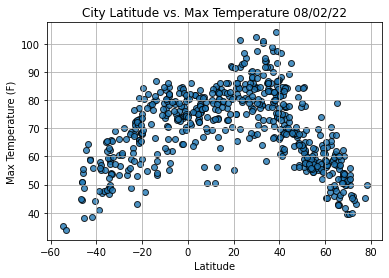

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

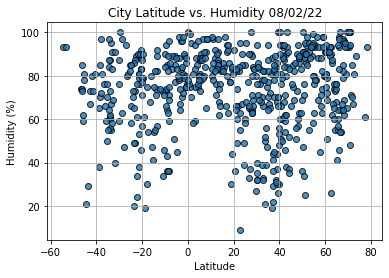

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

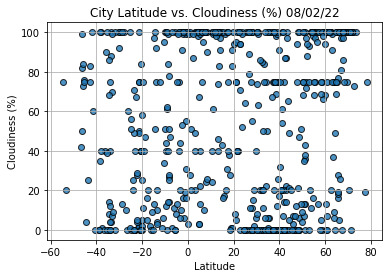

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

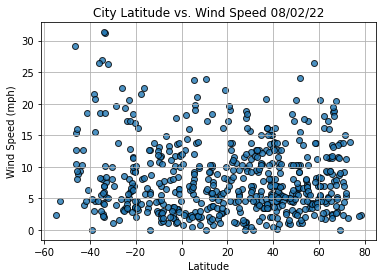

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [28]:
index13 = city_data_df.loc[13]
index13

City                      Rikitea
Country                        PF
Date          2022-08-03 00:43:29
Lat                      -23.1203
Lng                     -134.9692
Max Temp                    72.34
Humidity                       73
Cloudiness                     40
Wind Speed                  20.58
Name: 13, dtype: object

In [29]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4       True
       ...  
576     True
577     True
578     True
579    False
580     True
Name: Lat, Length: 581, dtype: bool

In [30]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Puerto Ayacucho,VE,2022-08-03 00:43:24,5.6639,-67.6236,75.72,90,100,2.80
2,Albany,US,2022-08-03 00:41:58,42.6001,-73.9662,77.65,62,0,1.01
3,Homer,US,2022-08-03 00:40:19,59.6425,-151.5483,62.47,80,100,8.01
4,Cabo San Lucas,MX,2022-08-03 00:39:33,22.8909,-109.9124,91.62,55,0,11.50
5,Santa Rosa,PH,2022-08-03 00:39:15,14.3122,121.1114,84.09,82,100,5.26


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

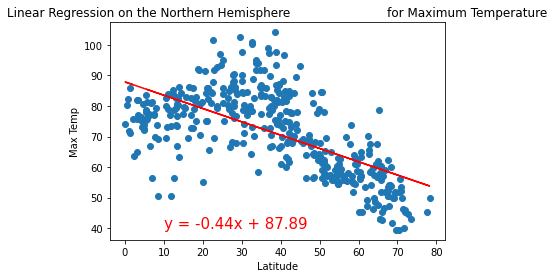

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

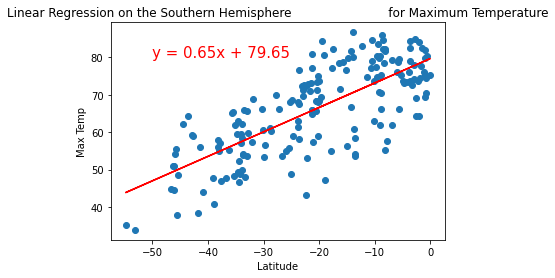

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

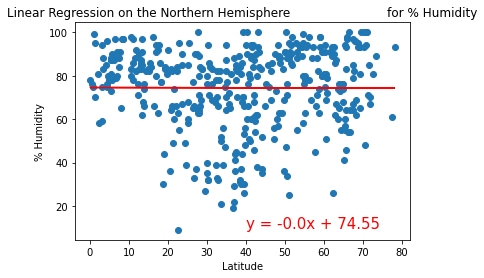

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

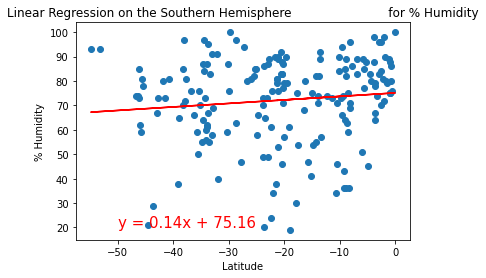

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,20))

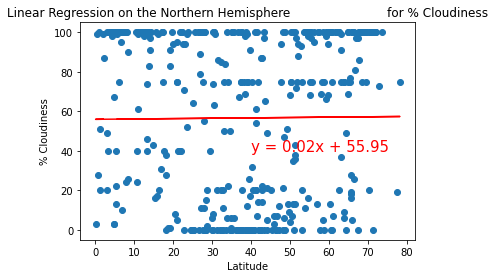

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,40))

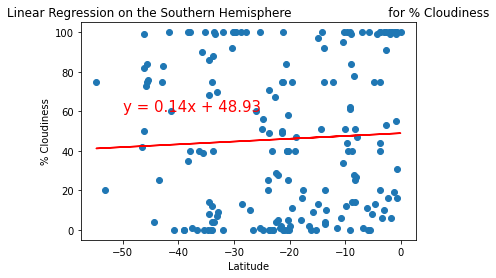

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

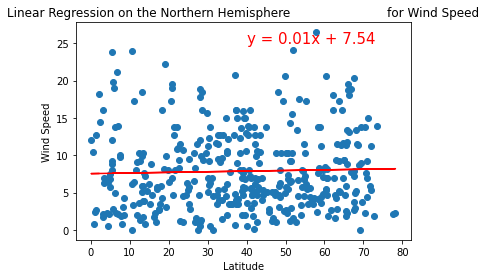

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))

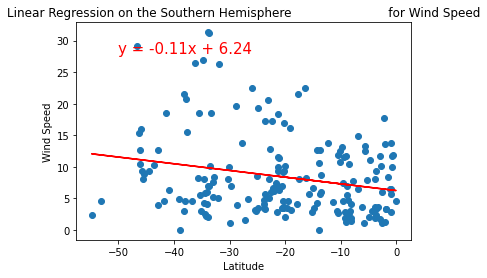

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,28))